##Importar módulos

In [38]:
from keras.utils import np_utils
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import np_utils                         
from tensorflow import keras

##Verificar que se esta trabajando con la GPU

In [39]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

##Descargar dataset CIFAR10

In [40]:
(x_train_ori, y_train_ori), (x_test_ori, y_test_ori) = cifar10.load_data()
print(x_train_ori.shape)

(50000, 32, 32, 3)


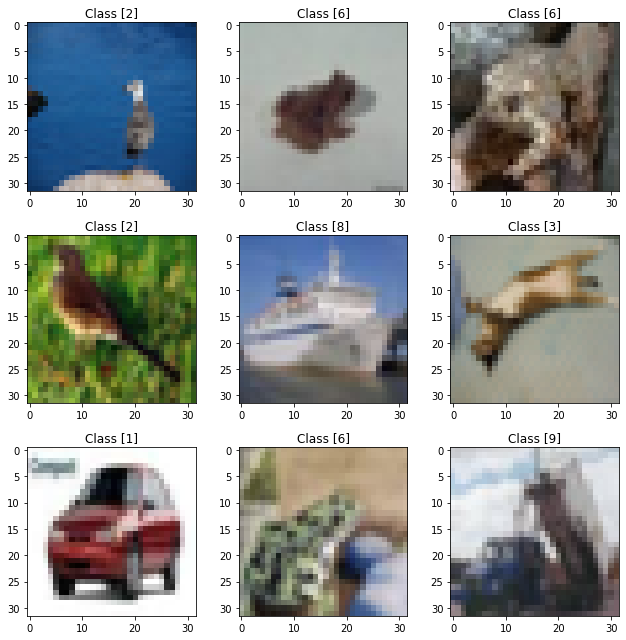

In [41]:
import random 

plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(x_train_ori))
    plt.imshow(x_train_ori[num])
    plt.title("Class {}".format(y_train_ori[num]))
    
plt.tight_layout()

In [42]:
print(x_train_ori[10])

[[[53 65 53]
  [54 63 52]
  [56 60 50]
  ...
  [47 51 50]
  [41 45 44]
  [24 28 27]]

 [[46 59 41]
  [53 62 45]
  [54 59 44]
  ...
  [42 46 45]
  [39 43 42]
  [28 32 31]]

 [[45 59 38]
  [50 60 41]
  [46 52 34]
  ...
  [38 42 41]
  [36 40 39]
  [29 33 32]]

 ...

 [[71 83 66]
  [74 83 66]
  [80 85 67]
  ...
  [51 54 33]
  [46 49 34]
  [49 50 41]]

 [[75 82 67]
  [79 85 69]
  [81 85 67]
  ...
  [61 65 41]
  [64 67 48]
  [48 50 41]]

 [[85 83 71]
  [85 84 71]
  [86 86 70]
  ...
  [61 65 39]
  [64 67 46]
  [49 50 41]]]


## Normalización y vector categórico

In [43]:
# Normalización de las imágenes

x_train = x_train_ori
x_test = x_test_ori  
x_train_ori = x_train.astype('float32') 
x_test_ori = x_test.astype('float32') 
x_train = x_train / 255.0
x_test = x_test / 255.0

print(y_train_ori)

# Codificación one hot 
y_train = np_utils.to_categorical(y_train_ori)
y_test = np_utils.to_categorical(y_test_ori)
num_classes = y_test.shape[1]

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [44]:
print(x_train[10])

[[[0.20784314 0.25490196 0.20784314]
  [0.21176471 0.24705882 0.20392157]
  [0.21960784 0.23529412 0.19607843]
  ...
  [0.18431373 0.2        0.19607843]
  [0.16078431 0.17647059 0.17254902]
  [0.09411765 0.10980392 0.10588235]]

 [[0.18039216 0.23137255 0.16078431]
  [0.20784314 0.24313725 0.17647059]
  [0.21176471 0.23137255 0.17254902]
  ...
  [0.16470588 0.18039216 0.17647059]
  [0.15294118 0.16862745 0.16470588]
  [0.10980392 0.1254902  0.12156863]]

 [[0.17647059 0.23137255 0.14901961]
  [0.19607843 0.23529412 0.16078431]
  [0.18039216 0.20392157 0.13333333]
  ...
  [0.14901961 0.16470588 0.16078431]
  [0.14117647 0.15686275 0.15294118]
  [0.11372549 0.12941176 0.1254902 ]]

 ...

 [[0.27843137 0.3254902  0.25882353]
  [0.29019608 0.3254902  0.25882353]
  [0.31372549 0.33333333 0.2627451 ]
  ...
  [0.2        0.21176471 0.12941176]
  [0.18039216 0.19215686 0.13333333]
  [0.19215686 0.19607843 0.16078431]]

 [[0.29411765 0.32156863 0.2627451 ]
  [0.30980392 0.33333333 0.27058824]


In [45]:
# Verificación de las dimesiones de los datos de entrenamiento. Note que al ser 
# imágenes a color se tienen 3 canales
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 10)


##Definir la arquitectura de la red CNN

In [46]:
modelo = keras.models.Sequential()
modelo.add(keras.layers.Conv2D(8, (3, 3),padding='same' ,input_shape=(32, 32, 3)))
modelo.add(keras.layers.BatchNormalization())
modelo.add(keras.layers.Activation("relu"))
modelo.add(keras.layers.Conv2D(16, (3, 3), padding='same'))
modelo.add(keras.layers.BatchNormalization())
modelo.add(keras.layers.Activation("relu"))
modelo.add(keras.layers.MaxPooling2D((2, 2)))
modelo.add(keras.layers.Conv2D(32, (3, 3),padding='same'))
modelo.add(keras.layers.BatchNormalization())
modelo.add(keras.layers.Activation("relu"))
modelo.add(keras.layers.Flatten())
modelo.add(keras.layers.Dense(10, activation='softmax'))

modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 8)         224       
                                                                 
 batch_normalization_3 (Batc  (None, 32, 32, 8)        32        
 hNormalization)                                                 
                                                                 
 activation_3 (Activation)   (None, 32, 32, 8)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 16)        1168      
                                                                 
 batch_normalization_4 (Batc  (None, 32, 32, 16)       64        
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 32, 32, 16)       

In [47]:
# Compilación del modelo
modelo.compile(loss='categorical_crossentropy', 
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  metrics=['accuracy'])


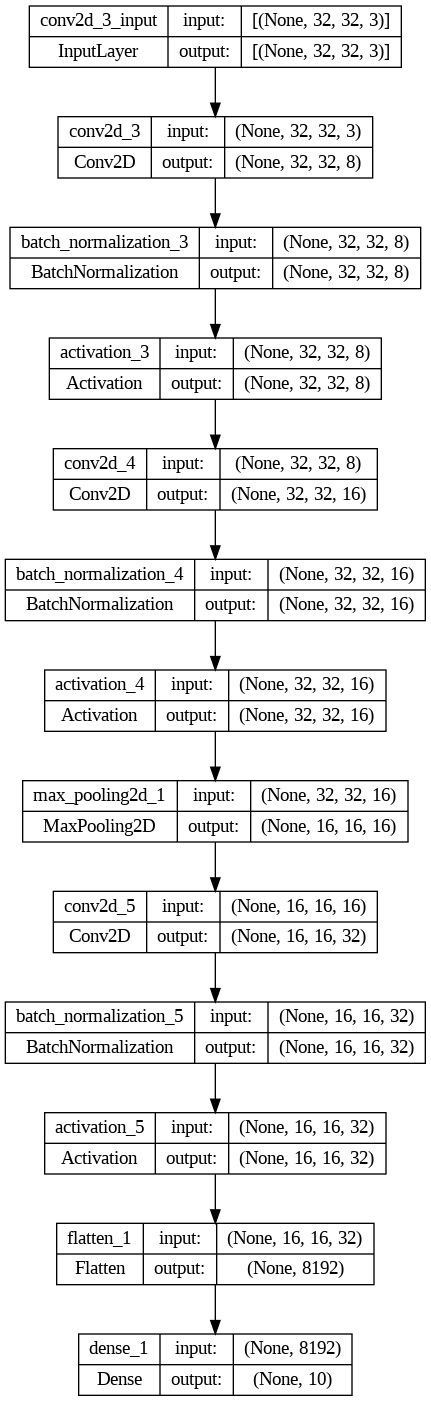

In [48]:
tf.keras.utils.plot_model(modelo, to_file='model_plot.png',
                          show_shapes=True, show_layer_names=True)

In [49]:
print(x_test.shape)
print(y_test.shape)

print(x_train.shape)
print(y_train.shape)

(10000, 32, 32, 3)
(10000, 10)
(50000, 32, 32, 3)
(50000, 10)


##Entrenar modelo

In [50]:
print(x_train.shape)
history = modelo.fit(x_train, y_train, validation_data=(x_test, y_test),
                    epochs=10, batch_size=32, verbose=0, shuffle=True)

(50000, 32, 32, 3)


##Graficar evolución del modelo

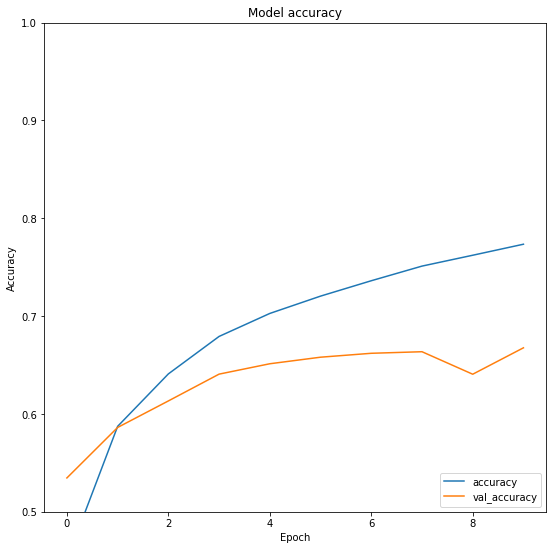

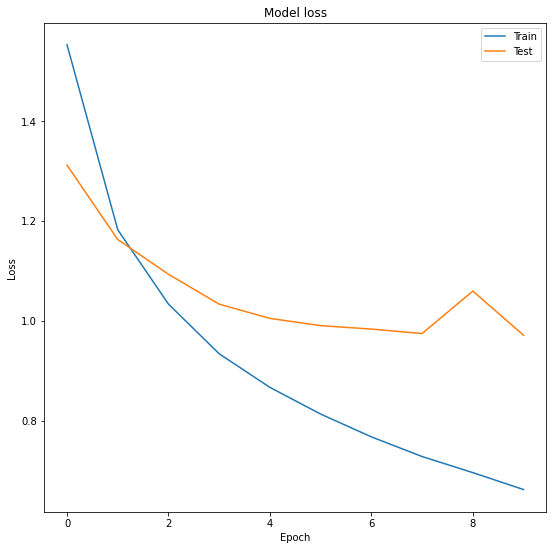

In [51]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [52]:
# Evaluación del modelo
Score = modelo.evaluate(x_test, y_test, verbose=0)[1]

print(np.round(Score,decimals=4))

outputTrain=modelo.predict(x_test)

0.6676
313/313 [==============================] - 1s 3ms/step


In [53]:
# Predicción de las salidas del modelo con los datos de prueba
predicted_classes_Temp = modelo.predict(x_test)
predicted_classes =np.argmax(predicted_classes_Temp, axis=1)
real_classes =np.argmax(y_test, axis=1)
correct_indices = np.nonzero(predicted_classes == real_classes)[0]
incorrect_indices = np.nonzero(predicted_classes != real_classes)[0]

313/313 [==============================] - 1s 2ms/step


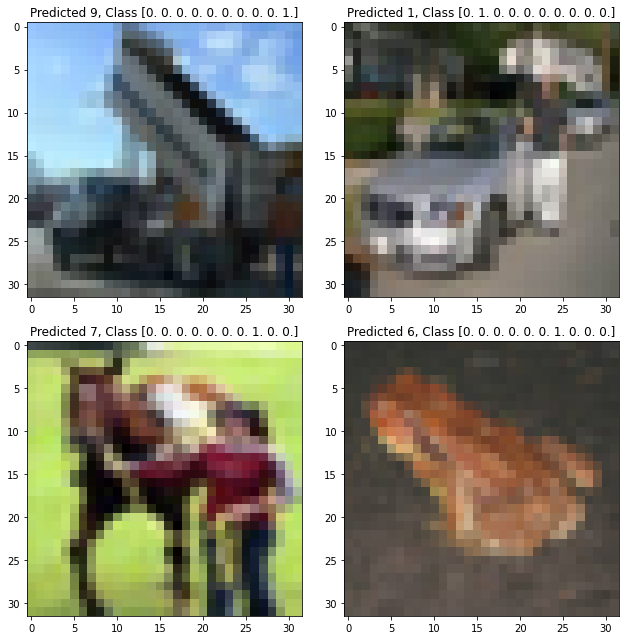

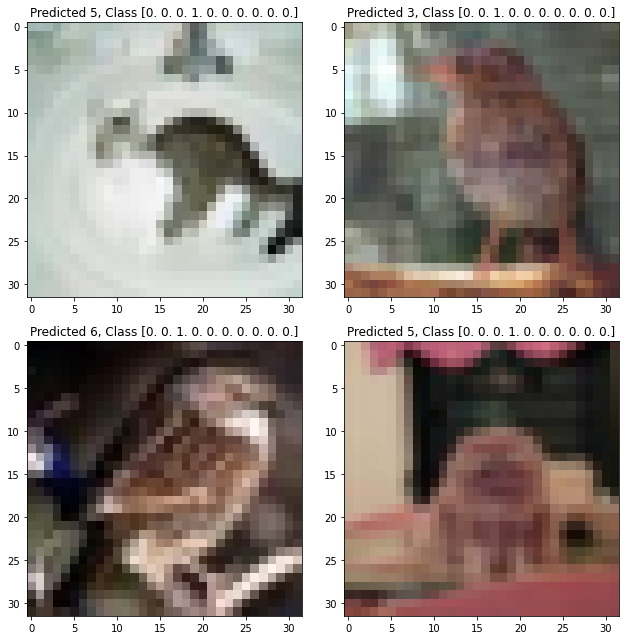

In [54]:
# Graficación de imágenes de prueba con clasificación correcta e incorrecta
plt.figure()
Indices_Correctos=np.random.permutation(6495)
for i, correct in enumerate(correct_indices[Indices_Correctos[:4]]):
    plt.subplot(2,2,i+1)
    plt.imshow(x_test[correct])
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.tight_layout()

Indices_Incorrectos=np.random.permutation(3539)
plt.figure()
for i, incorrect in enumerate(incorrect_indices[Indices_Incorrectos[:4]]):
    plt.subplot(2,2,i+1)
    plt.imshow(x_test[incorrect])
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.tight_layout()

##Matriz de confusión 

              precision    recall  f1-score   support

           0       0.63      0.74      0.68      1000
           1       0.77      0.76      0.76      1000
           2       0.53      0.61      0.57      1000
           3       0.51      0.44      0.47      1000
           4       0.64      0.61      0.62      1000
           5       0.56      0.63      0.59      1000
           6       0.83      0.68      0.75      1000
           7       0.79      0.67      0.72      1000
           8       0.80      0.73      0.76      1000
           9       0.69      0.81      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000

[[738  30  64  16  14   5   5   3  68  57]
 [ 31 758  10   8   1   4   5   4  24 155]
 [ 88   8 612  54  78  60  38  32  12  18]
 [ 39  20 109 440  61 222  48  20  13  28]
 [ 37   2 122  62 606  49  32  63  16  11]
 [ 21   9  78 164  34 627 

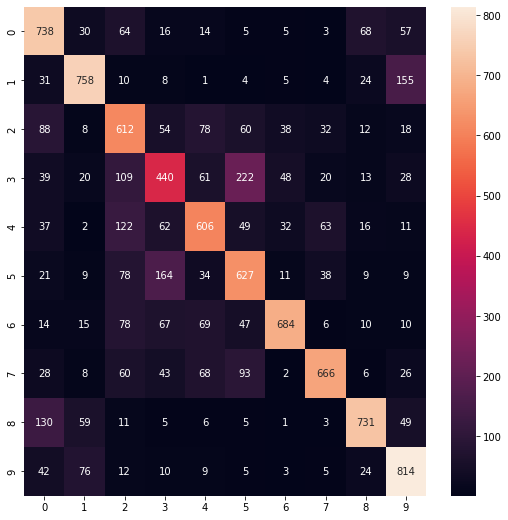

In [55]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
#import matplotlib.pyplot as plt
import pandas as pd

y_test_class = np.argmax(y_test,axis=1) 
y_pred_class = np.argmax(outputTrain,axis=1) 

# Cálculo de las métricas 
print(classification_report(y_test_class, y_pred_class)) # Precision , Recall, F1-Score & Support
cm = confusion_matrix(y_test_class, y_pred_class)
print(cm)
# Visualización de la matriz de confusion en un mapa de calor
df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

In [56]:
!pwd # Linux command, shows where we are in CoLab's folders

/content


In [57]:
# Se guarda el modelo en formato Keras
modelo.save('cifar_10_model.h5')

In [58]:
# Se guarda el modelo en formato TensorFlow
modelo.save('cifar_10_model')

In [59]:
# Se convierte el modelo a TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(modelo)

In [60]:

modelo_tflite = converter.convert()

In [61]:
# Se guarda el modelo 
open("/content/cifar10.tflite","wb").write(modelo_tflite)

355792

In [62]:
#  Probar el modelo cuantizado
interpreter = tf.lite.Interpreter("/content/cifar10.tflite")

In [63]:
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [64]:
input_details

[{'name': 'serving_default_conv2d_3_input:0',
  'index': 0,
  'shape': array([ 1, 32, 32,  3], dtype=int32),
  'shape_signature': array([-1, 32, 32,  3], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [65]:
output_details

[{'name': 'StatefulPartitionedCall:0',
  'index': 16,
  'shape': array([ 1, 10], dtype=int32),
  'shape_signature': array([-1, 10], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [66]:
def set_input_tensor(interpreter, image):
    tensor_index = interpreter.get_input_details()[0]['index']
    input_tensor = interpreter.tensor(tensor_index)()[0]
    input_tensor[:, :] = image

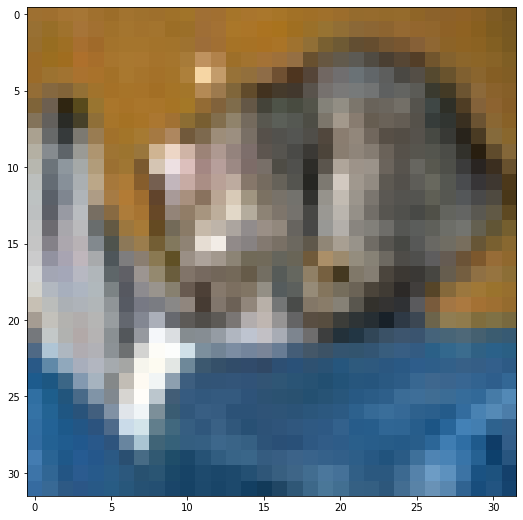

In [67]:
image = x_test[0]
plt.imshow(image);

In [68]:
set_input_tensor(interpreter, image) 
interpreter.invoke()
output_details = interpreter.get_output_details()[0]

In [69]:
salida=interpreter.get_tensor(output_details['index'])
print(salida)

[[1.8719551e-03 3.8386878e-04 2.5633788e-03 2.0461306e-01 1.1705182e-03
  1.5180547e-02 3.3106282e-03 1.0809945e-04 7.7070868e-01 8.9355854e-05]]


In [70]:
img_pred = np.argmax(salida)
print(img_pred)

8


In [71]:
print(y_test[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [72]:
salida[0,img_pred]

0.7707087

In [73]:
EntradaPrueba=np.zeros((1,32,32,3))
EntradaPrueba[0,:,:,:]=image
Salidaprueba=modelo.predict(EntradaPrueba)


1/1 [==============================] - 0s 26ms/step


In [74]:
ImagenPrueba=np.zeros((1,32,32,3))
ImagenPrueba[0,:,:,:]=x_test[0]
prediccion = modelo.predict(ImagenPrueba)
print(prediccion)
img_pred = np.argmax(prediccion)
print(img_pred)
print(prediccion[0,img_pred])

1/1 [==============================] - 0s 38ms/step
[[1.8719666e-03 3.8387175e-04 2.5633879e-03 2.0461284e-01 1.1705194e-03
  1.5180562e-02 3.3106238e-03 1.0809853e-04 7.7070874e-01 8.9356545e-05]]
8
0.77070874
